<a href="https://colab.research.google.com/github/YasmineSarraj/M3-Assignments-Deep-Learning/blob/main/CNN_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Applied Deep Learning

**Topic:** Build train and evaluate 2 special types of networks neural network with Pytorch. 


## Import Kaggle set up

In [ ]:
! pip install gradio

In [ ]:
! pip install kaggle -q

In [ ]:
! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/ 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
! kaggle datasets download -d srinuti/residential-power-usage-3years-data-timeseries 

  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 90.3MB/s]


In [ ]:
! unzip residential-power-usage-3years-data-timeseries.zip

Archive:  residential-power-usage-3years-data-timeseries.zip
  inflating: power_usage_2016_to_2020.csv  
  inflating: weather_2016_2020_daily.csv  


#  CNN

**Topic:** Build train and evaluate a Image recognition Model using pytorch. We used the FashionMINST Dataset provided by pytorch.

## Import dependencies

In [34]:
#Loading essential libraries
import numpy as np
import pandas as pd
import math 

#Neural network libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torchvision import datasets

#Visualization 
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

This should include:

1. Feature selection and/or engineering (if necessary)
2. SPreprocessing (if necessary)
3. Train-test split.
4. Defining a neural network architecture in pytorch
5. Define a training loop.
6. training the model.
7. Try out different hyperparameters.
8. Evaluate the final model on the test data.
9. Visualize results with Grad.io (optional)

## Hyperparameters of the first model 

In [81]:
# Hyper-parameters of the model 1
num_epochs_1 = 4
batch_size_1 = 4
learning_rate_1 = 0.001

In [82]:
#check what this does
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

## Train test split 
Due to the nature of the dataset we chose from Pytorch it is already divided by train and test data. 

In [85]:
#data downloaded 
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

#Here we load the data
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size_1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size_1, shuffle=False)

In [86]:
#Define the classes (proided by pytorch literature)
classes = ('T-Shirt', 'Trouser', 'Pullover', 'Dress','Coat','Sandal' 'Shirt','Sneaker','Bag','Ankle Boot')

## Defining neural network architecture in pytorch
Here we are implementing a convolutional network. The architechture of this network consists 2 part mainly the features learning and the classification part. 

*   The feature learning part is consisting of 2 pair of the convolution layer followed by the ReLu activation function and inbetween we use a max pooling layer.
*   The classification  part is three different fully connected layer and the softmax and cross enthropy. 

In [87]:
# implement Convolutional networks
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        #feature learning part
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2,2) #kernel_size:2 stride: 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        #Classification 
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) #12*4*4= number of output channels * dimension of the output layer after feature learning; 120 manually set as outcome of the 
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=10) #the output dimension (in our case 10) needs to be equal to the number of classes
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 12*4*4) #torch.view() function freshape the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = ConvNet().to(device)

In [88]:
criterion = nn.CrossEntropyLoss() #CrossEntropyLoss already includes SoftMax
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate_1)

## Defining training loop & train the model
The trainig loop consist of a few simple steps: 


1.   Forward pass 
2.   Backward pass and optimization 
3.  Calculates the loss 



In [89]:
#Training loop 
n_total_steps = len(train_loader)
for epoch in range(num_epochs_1):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 1 input channel, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad() #with zero_grad() we ensure that the gradients are properly reset to zero at the start of each iteration
        loss.backward() 
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs_1}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            # Calculate average accuracy for every 2000 steps
            model.eval()
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                accuracy = correct / total
                
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/4], Step [2000/15000], Loss: 2.3325
Epoch [1/4], Step [4000/15000], Loss: 2.2167
Epoch [1/4], Step [6000/15000], Loss: 0.8212
Epoch [1/4], Step [8000/15000], Loss: 0.9178
Epoch [1/4], Step [10000/15000], Loss: 0.3666
Epoch [1/4], Step [12000/15000], Loss: 0.7074
Epoch [1/4], Step [14000/15000], Loss: 0.6815
Epoch [2/4], Step [2000/15000], Loss: 0.7782
Epoch [2/4], Step [4000/15000], Loss: 0.8392
Epoch [2/4], Step [6000/15000], Loss: 1.4903
Epoch [2/4], Step [8000/15000], Loss: 0.3729
Epoch [2/4], Step [10000/15000], Loss: 0.2071
Epoch [2/4], Step [12000/15000], Loss: 1.9788
Epoch [2/4], Step [14000/15000], Loss: 0.8066
Epoch [3/4], Step [2000/15000], Loss: 0.4252
Epoch [3/4], Step [4000/15000], Loss: 0.9989
Epoch [3/4], Step [6000/15000], Loss: 0.6118
Epoch [3/4], Step [8000/15000], Loss: 0.5119
Epoch [3/4], Step [10000/15000], Loss: 0.1911
Epoch [3/4], Step [12000/15000], Loss: 0.6951
Epoch [3/4], Step [14000/15000], Loss: 0.3221
Epoch [4/4], Step [2000/15000], Loss: 0.8659
E

Here we have a schema to show the infrastructure of our network. 

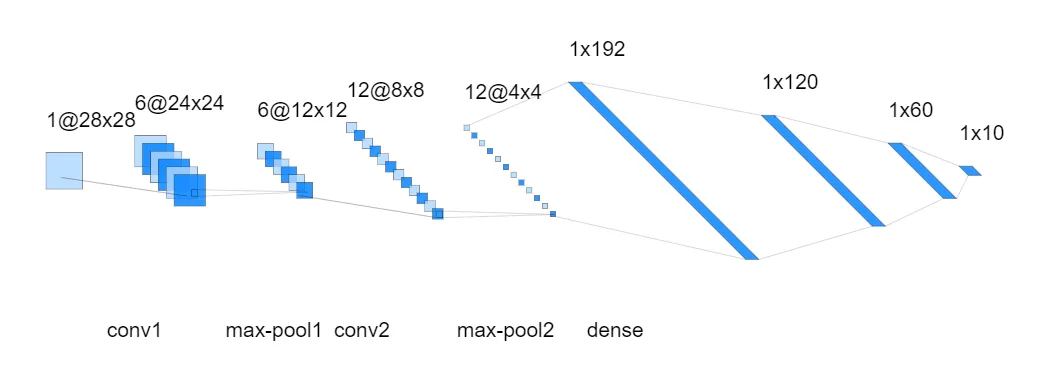

## Evaluate the first model on the test data

In [90]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size_1):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(9):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 80.12 %
Accuracy of T-Shirt: 72.9 %
Accuracy of Trouser: 92.7 %
Accuracy of Pullover: 58.8 %
Accuracy of Dress: 80.7 %
Accuracy of Coat: 71.5 %
Accuracy of SandalShirt: 93.1 %
Accuracy of Sneaker: 54.1 %
Accuracy of Bag: 87.9 %
Accuracy of Ankle Boot: 94.2 %


## Testing out different parameters

Here we have changed the learning rate 

In [91]:
# Hyper-parameters of the model 2
num_epochs_2 = 4
batch_size_2 = 4
learning_rate_2 = 0.004

In [92]:
criterion = nn.CrossEntropyLoss() #CrossEntropyLoss already includes SoftMax
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate_1)

In [93]:
#Training loop 
n_total_steps = len(train_loader)
for epoch in range(num_epochs_2):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        #images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad() #with zero_grad() we ensure that the gradients are properly reset to zero at the start of each iteration
        loss.backward() 
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs_2}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            # Calculate average accuracy for every 2000 steps
            model.eval()
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                accuracy = correct / total
                
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/4], Step [2000/15000], Loss: 0.6305
Epoch [1/4], Step [4000/15000], Loss: 0.0348
Epoch [1/4], Step [6000/15000], Loss: 0.0191
Epoch [1/4], Step [8000/15000], Loss: 0.6924
Epoch [1/4], Step [10000/15000], Loss: 0.8126
Epoch [1/4], Step [12000/15000], Loss: 0.8272
Epoch [1/4], Step [14000/15000], Loss: 0.3163
Epoch [2/4], Step [2000/15000], Loss: 0.1355
Epoch [2/4], Step [4000/15000], Loss: 0.5293
Epoch [2/4], Step [6000/15000], Loss: 0.2547
Epoch [2/4], Step [8000/15000], Loss: 0.6199
Epoch [2/4], Step [10000/15000], Loss: 0.7575
Epoch [2/4], Step [12000/15000], Loss: 0.1223
Epoch [2/4], Step [14000/15000], Loss: 0.3191
Epoch [3/4], Step [2000/15000], Loss: 0.1148
Epoch [3/4], Step [4000/15000], Loss: 0.2645
Epoch [3/4], Step [6000/15000], Loss: 0.1578
Epoch [3/4], Step [8000/15000], Loss: 0.5629
Epoch [3/4], Step [10000/15000], Loss: 0.1797
Epoch [3/4], Step [12000/15000], Loss: 0.0207
Epoch [3/4], Step [14000/15000], Loss: 1.3888
Epoch [4/4], Step [2000/15000], Loss: 0.0795
E

In [94]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size_2):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(9):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 84.93 %
Accuracy of T-Shirt: 84.1 %
Accuracy of Trouser: 94.9 %
Accuracy of Pullover: 78.2 %
Accuracy of Dress: 87.5 %
Accuracy of Coat: 75.8 %
Accuracy of SandalShirt: 95.9 %
Accuracy of Sneaker: 50.8 %
Accuracy of Bag: 90.4 %
Accuracy of Ankle Boot: 96.7 %
